# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [1]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [2]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [3]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [4]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [5]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.5,99,1.0
1,2023-01-01T01:00,10.4,98,0.1
2,2023-01-01T02:00,10.3,96,0.0
3,2023-01-01T03:00,9.7,95,0.0
4,2023-01-01T04:00,9.0,95,0.0


In [6]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [9]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/tmp/ipykernel_12210/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [7]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.319048,86.267857,0.136905
std,3.525764,12.804132,0.431063
min,0.400000,45.000000,0.000000
25%,5.875000,81.000000,0.000000
50%,8.200000,90.000000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


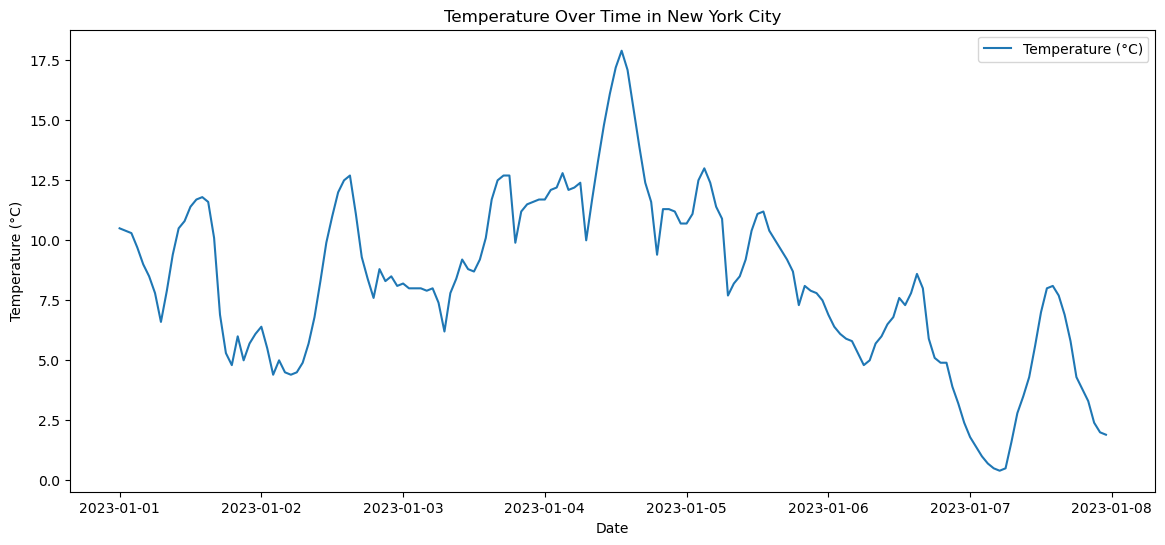

In [8]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

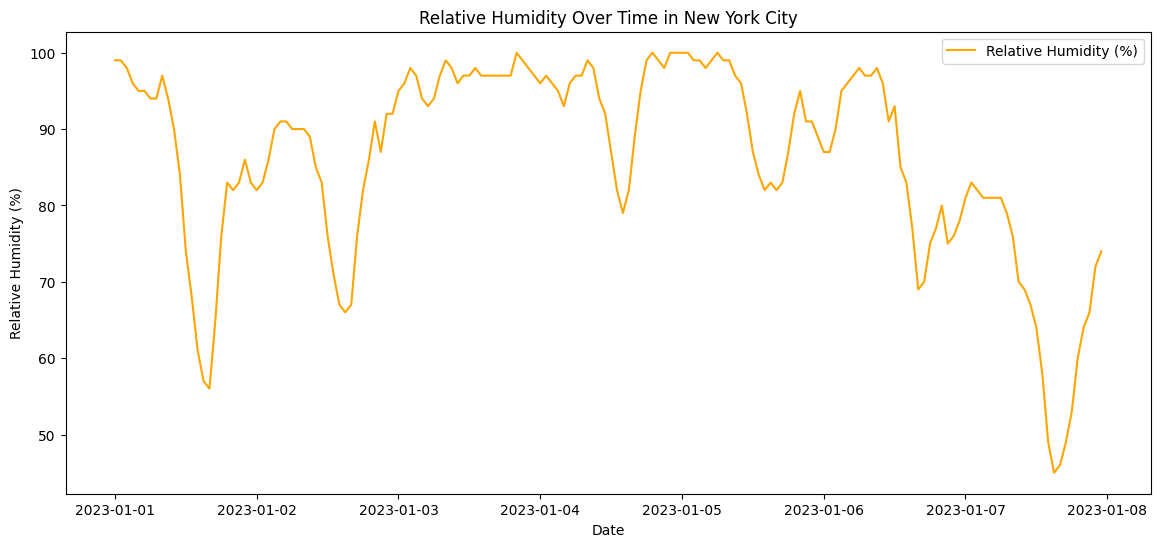

In [12]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


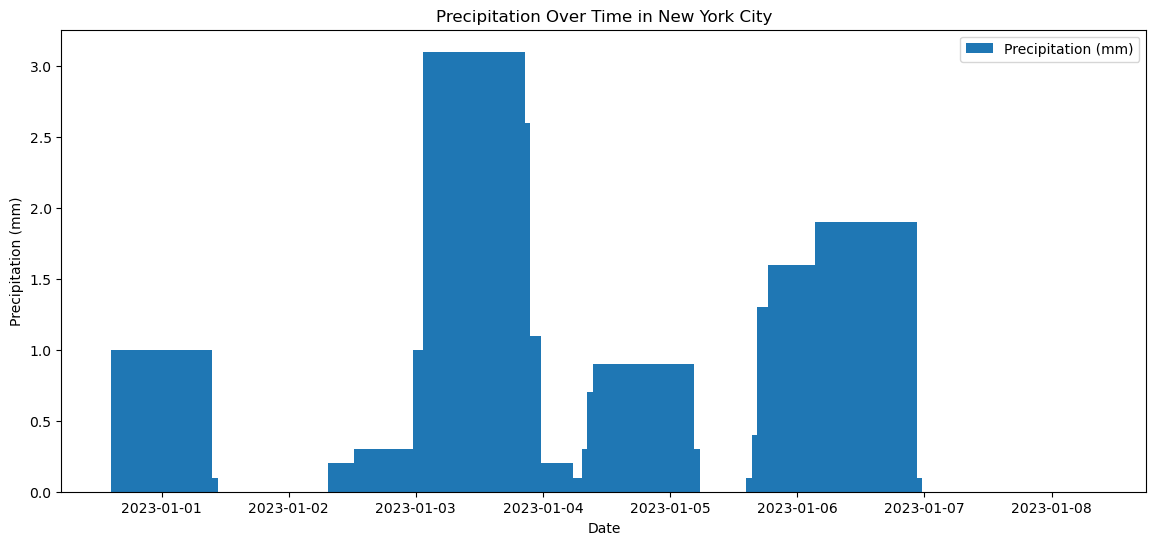

In [9]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [10]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.25


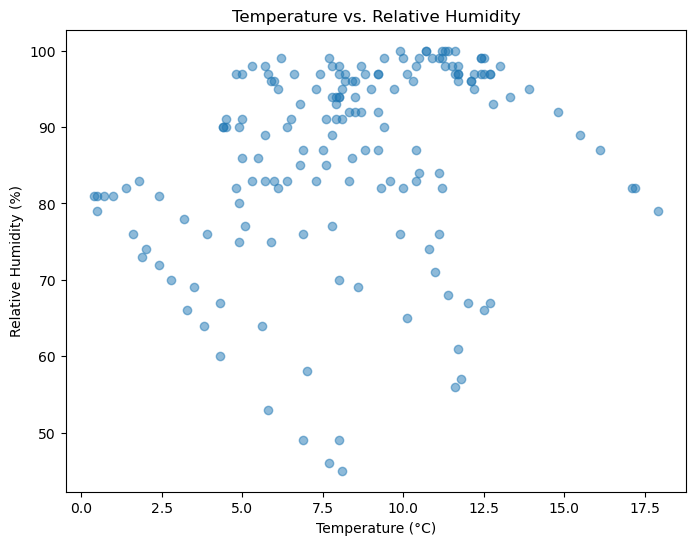

In [11]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [12]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.658333,83.000000,0.045833
2023-01-02,7.858333,84.000000,0.025000
2023-01-03,9.558333,96.916667,0.391667
2023-01-04,12.954167,94.333333,0.095833
2023-01-05,9.783333,92.125000,0.000000


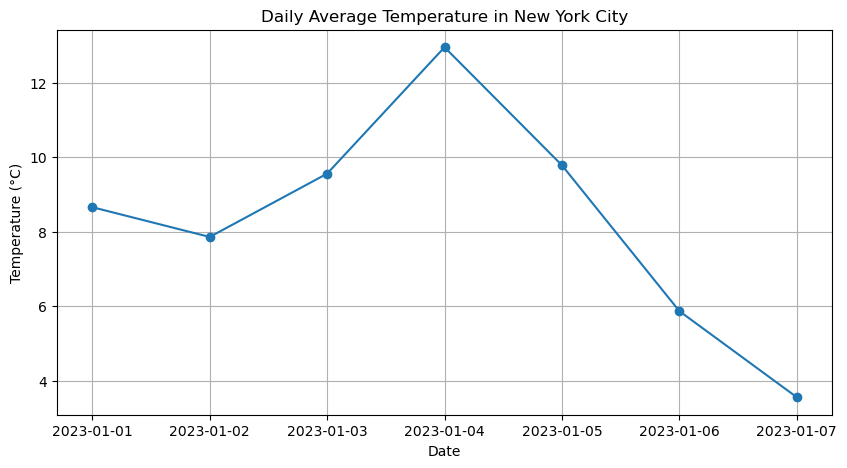

In [13]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [14]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\asraf\AppData\Local\Temp\ipykernel_4932\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [15]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [16]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


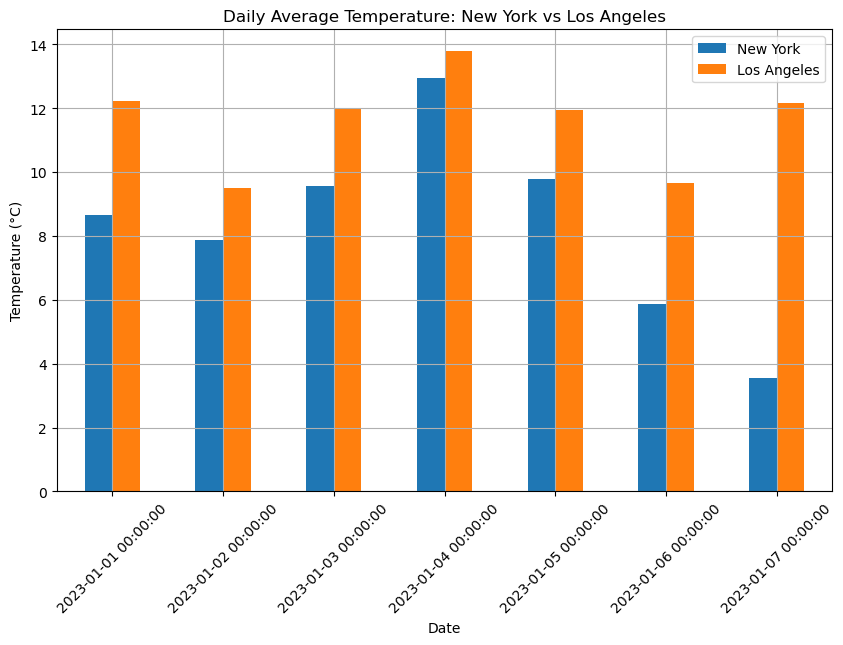

In [17]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [18]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.658333,12.233333,3.575000
2023-01-02,7.858333,9.495833,1.637500
2023-01-03,9.558333,11.970833,2.412500
2023-01-04,12.954167,13.775000,0.820833
2023-01-05,9.783333,11.950000,2.166667
2023-01-06,5.866667,9.662500,3.795833
2023-01-07,3.554167,12.154167,8.600000


In [19]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [20]:

# Step 1: Set Up Parameters

# Location coordinates for London City
latitude = 51.5074
longitude = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One week of data

# Variables to fetch
hourly_variables = [ 'precipitation']


In [21]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)


In [22]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [23]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df_london = pd.DataFrame(hourly_data)
df_london.head()


,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [24]:
 # Convert 'time' column to datetime
df_london['time'] = pd.to_datetime(df_london['time'])

# Set 'time' as the index
df_london.set_index('time', inplace=True)

# Check for missing values
df_london.isnull().sum()


precipitation    0
dtype: int64

In [25]:
# Handle missing values (if any)
df_london.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\asraf\AppData\Local\Temp\ipykernel_4932\1762542471.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_london.fillna(method='ffill', inplace=True)  # Forward fill


In [26]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df_london.describe()

,precipitation
count,8760.000000
mean,0.075696
std,0.404506
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


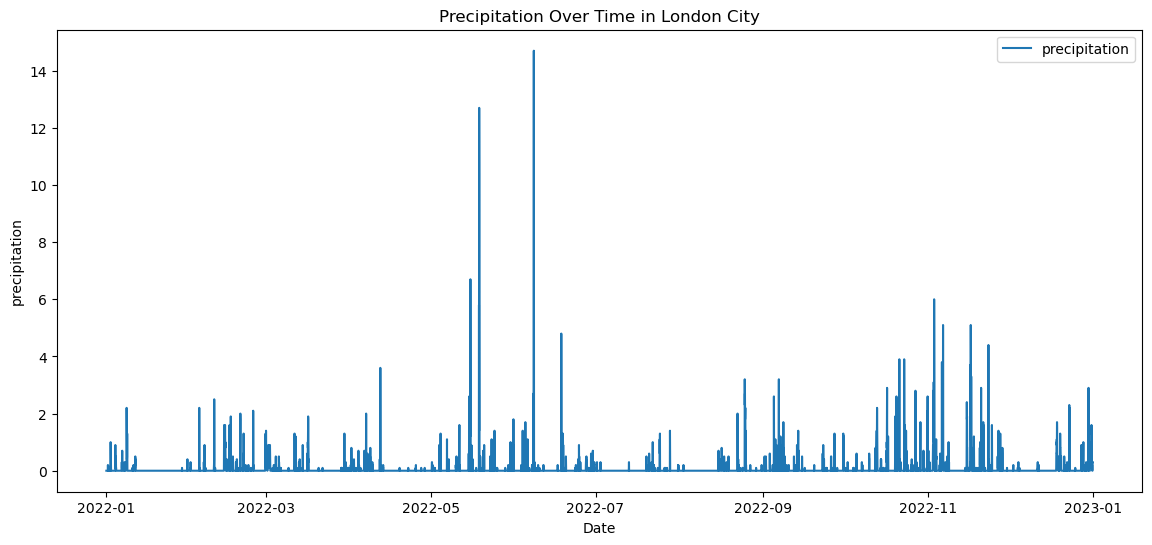

In [27]:
# Plot percipitation Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_london.index, df_london['precipitation'], label='precipitation')
plt.title('Precipitation Over Time in London City')
plt.xlabel('Date')
plt.ylabel('precipitation')
plt.legend()
plt.show()


In [28]:
# Resample the hourly data to weekly totals.
weekly_totals_london = df_london.resample('W').sum()
# Display the first few rows of the weekly totals
print(weekly_totals_london)

            precipitation
time                     
2022-01-02            2.2
2022-01-09           12.9
2022-01-16            3.1
2022-01-23            0.0
2022-01-30            0.4
2022-02-06            8.8
2022-02-13           15.2
2022-02-20           26.7
2022-02-27            4.5
2022-03-06           26.1
2022-03-13            6.6
2022-03-20           12.0
2022-03-27            0.1
2022-04-03            7.7
2022-04-10           12.9
2022-04-17            5.4
2022-04-24            0.2
2022-05-01            2.1
2022-05-08            7.2
2022-05-15           30.5
2022-05-22           36.9
2022-05-29            7.2
2022-06-05           12.8
2022-06-12           34.0
2022-06-19           11.4
2022-06-26            4.3
2022-07-03            6.5
2022-07-10            0.0
2022-07-17            0.4
2022-07-24            9.9
2022-07-31            2.5
2022-08-07            0.2
2022-08-14            0.0
2022-08-21            6.9
2022-08-28           21.2
2022-09-04            3.8
2022-09-11  

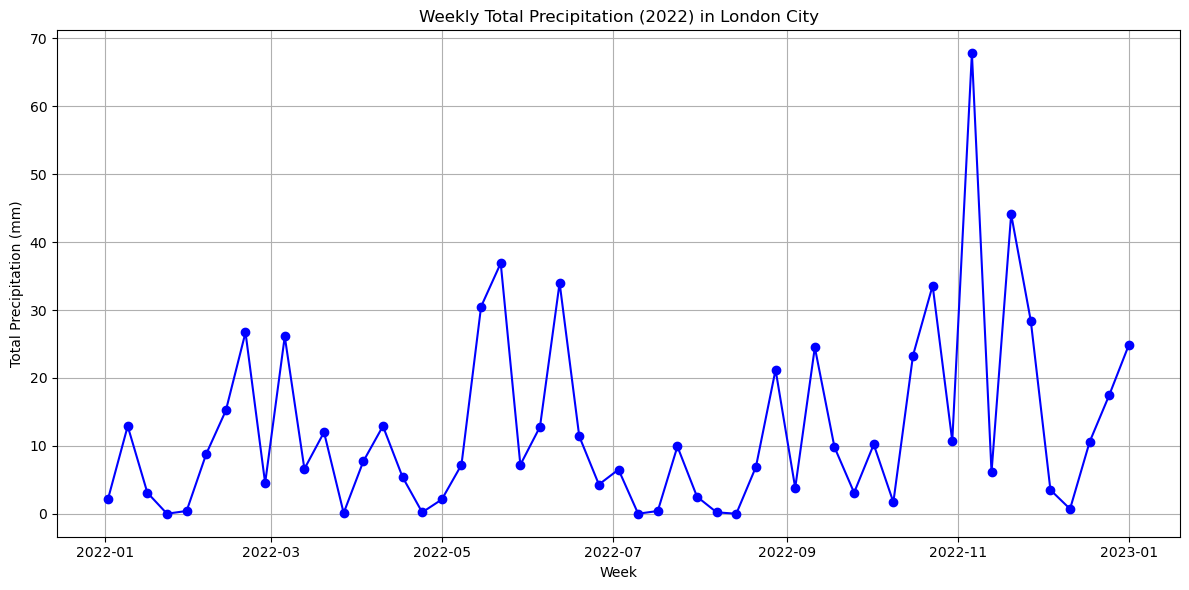

In [29]:
# Plot the weekly total precipitation
plt.figure(figsize=(12, 6))
plt.plot(weekly_totals_london.index, weekly_totals_london['precipitation'], color='blue', marker='o', linestyle='-')
plt.title('Weekly Total Precipitation (2022) in London City')
plt.xlabel('Week')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Step 1: Set Up Parameters

# Location coordinates for Seattle City
latitude_seattle = 47.6062
longitude_seattle = -122.3321


In [31]:
# Step 2: Make the API Request
params_seattle = {
    'latitude': latitude_seattle,
    'longitude': longitude_seattle,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_seattle = requests.get(base_url, params=params_seattle)

In [32]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [33]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df_seattle = pd.DataFrame(hourly_data)
df_seattle.head()


,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [34]:
# Convert 'time' column to datetime
df_seattle['time'] = pd.to_datetime(df_seattle['time'])

# Set 'time' as the index
df_seattle.set_index('time', inplace=True)

# Check for missing values
df_seattle.isnull().sum()


precipitation    0
dtype: int64

In [35]:
# Handle missing values (if any)
df_seattle.fillna(method='ffill', inplace=True)  # Forward fill

C:\Users\asraf\AppData\Local\Temp\ipykernel_4932\3112738535.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_seattle.fillna(method='ffill', inplace=True)  # Forward fill


In [36]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df_seattle.describe()

,precipitation
count,8760.000000
mean,0.075696
std,0.404506
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


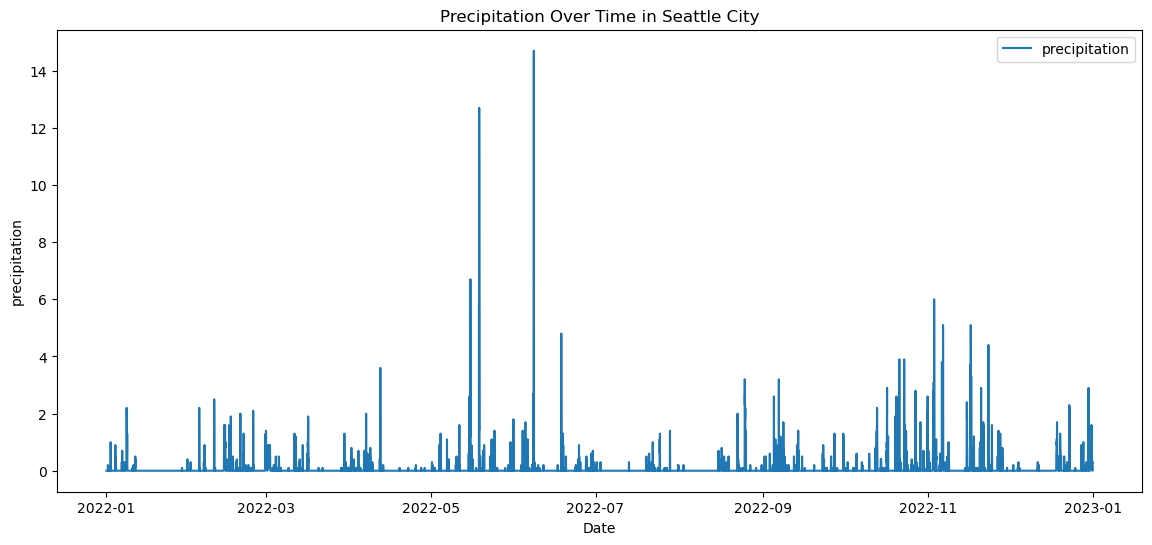

In [37]:
# Plot percipitation Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_seattle.index, df_seattle['precipitation'], label='precipitation')
plt.title('Precipitation Over Time in Seattle City')
plt.xlabel('Date')
plt.ylabel('precipitation')
plt.legend()
plt.show()

In [38]:
# Resample the hourly data to weekly totals.
weekly_totals_seattle = df_seattle.resample('W').sum()
# Display the first few rows of the weekly totals
print(weekly_totals_seattle)

            precipitation
time                     
2022-01-02            2.2
2022-01-09           12.9
2022-01-16            3.1
2022-01-23            0.0
2022-01-30            0.4
2022-02-06            8.8
2022-02-13           15.2
2022-02-20           26.7
2022-02-27            4.5
2022-03-06           26.1
2022-03-13            6.6
2022-03-20           12.0
2022-03-27            0.1
2022-04-03            7.7
2022-04-10           12.9
2022-04-17            5.4
2022-04-24            0.2
2022-05-01            2.1
2022-05-08            7.2
2022-05-15           30.5
2022-05-22           36.9
2022-05-29            7.2
2022-06-05           12.8
2022-06-12           34.0
2022-06-19           11.4
2022-06-26            4.3
2022-07-03            6.5
2022-07-10            0.0
2022-07-17            0.4
2022-07-24            9.9
2022-07-31            2.5
2022-08-07            0.2
2022-08-14            0.0
2022-08-21            6.9
2022-08-28           21.2
2022-09-04            3.8
2022-09-11  

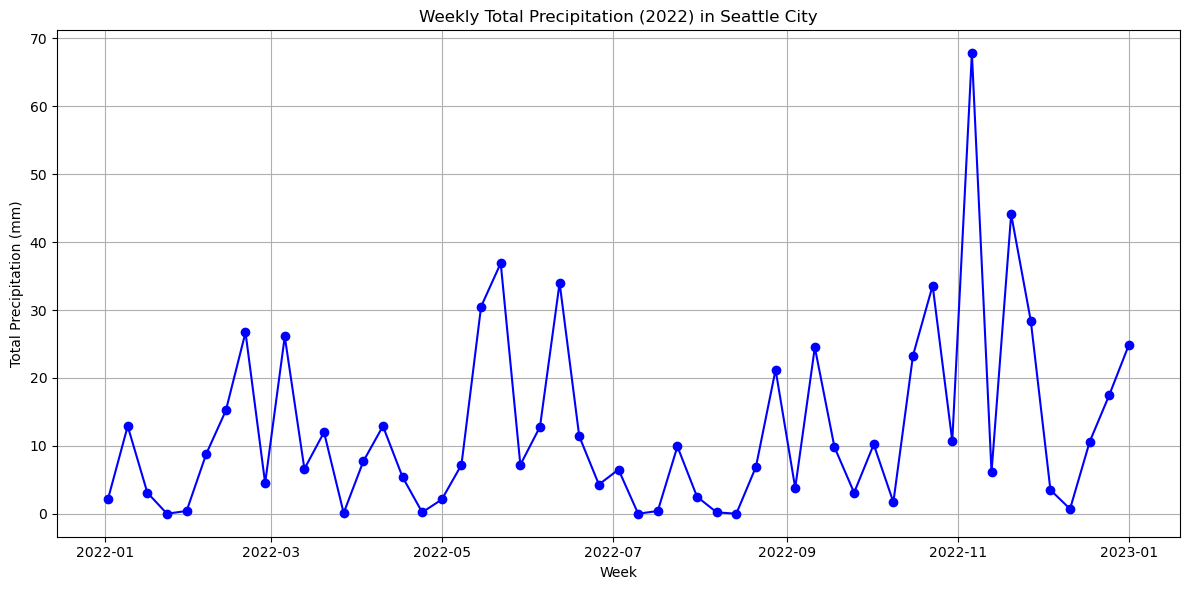

In [39]:
# Plot the weekly total precipitation
plt.figure(figsize=(12, 6))
plt.plot(weekly_totals_seattle.index, weekly_totals_seattle['precipitation'], color='blue', marker='o', linestyle='-')
plt.title('Weekly Total Precipitation (2022) in Seattle City')
plt.xlabel('Week')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Combine DataFrames for Comparison

combined_temp_lon_sea = pd.DataFrame({
    'London': weekly_totals_london['precipitation'],
    'Seattle': weekly_totals_seattle['precipitation']
})


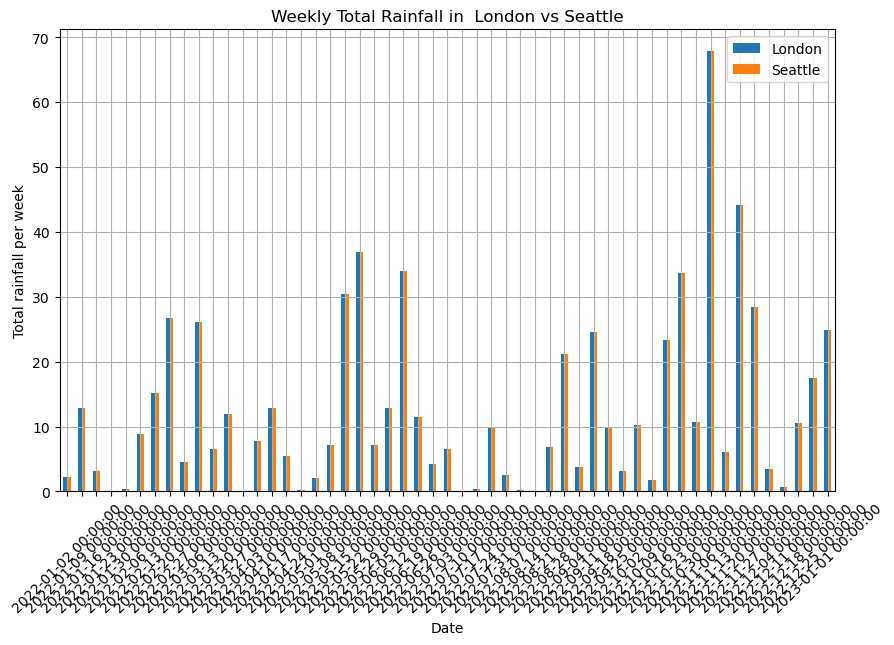

In [41]:
# Plot Comparison of Daily Average Temperature

combined_temp_lon_sea.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Total Rainfall in  London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Total rainfall per week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [42]:
# Calculate Temperature Difference
combined_temp_lon_sea['Raifall Amount  Difference'] = combined_temp_lon_sea['London']-combined_temp_lon_sea['Seattle']
combined_temp_lon_sea


,London,Seattle,Raifall Amount Difference
time,,,
2022-01-02,2.2,2.2,0.0
2022-01-09,12.9,12.9,0.0
2022-01-16,3.1,3.1,0.0
2022-01-23,0.0,0.0,0.0
2022-01-30,0.4,0.4,0.0
2022-02-06,8.8,8.8,0.0
2022-02-13,15.2,15.2,0.0
2022-02-20,26.7,26.7,0.0
2022-02-27,4.5,4.5,0.0


# Base on the data the rainfall pattern in london and seattle city is same.

In [ ]:
# Step 10: Save Data to CSV (Optional)

# Save London data
df_london.to_csv('london_weather.csv')

# Save Los Angeles data
df_seattle.to_csv('_weather.csv')
